<h1 align='center'> Introduction to Data Management,<br/> Analysis and Security</h1>



## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL

import datetime as dt

import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
# YOUR CODE HERE

df_bikeShare = pd.read_csv('bike-share.csv', index_col=0)
df_bikeShare['dteday'] = pd.to_datetime(df_bikeShare.dteday)

df_bikeShare.head()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<span style="color:blue">
    
### YOUR ANSWER HERE

Initially removed some columns but added them back for linear regression question and because I found some of them useful in different visualisations. Converted date column to datetime format to make it more useful.
</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

Mean count: 4504.3488372093025 

           atemp      temp          cnt
season                                 
1       0.296914  0.297748  2604.132597
2       0.520307  0.544405  4992.331522
3       0.655898  0.706309  5644.303191
4       0.415539  0.422906  4728.162921 

               atemp      temp   cnt
weathersit                          
1           0.511983  0.521667  4844
2           0.450121  0.458333  4040
3           0.439400  0.440000  1817 

                casual   registered          cnt
workingday                                      
0           873.064794  1293.867686  2052.141245
1           391.496032  1568.692453  1878.415583 



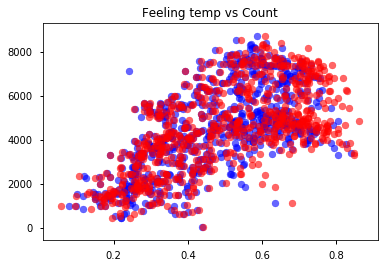

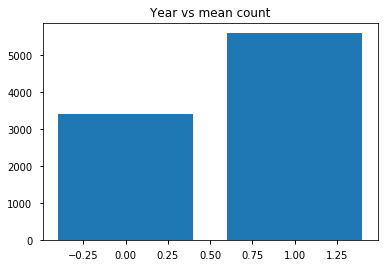

In [4]:
# YOUR CODE HERE
print('Mean count:',df_bikeShare['cnt'].mean(), "\n")

df_seasonal = df_bikeShare.groupby(['season'])['atemp', 'temp', 'cnt'].mean()
print(df_seasonal, "\n")

df_weather = df_bikeShare.groupby(['weathersit'])['atemp', 'temp', 'cnt'].median()
print(df_weather, "\n")

df_holiday = df_bikeShare.groupby(['workingday'])['casual', 'registered', 'cnt'].std()
print(df_holiday, "\n")

plt.scatter(df_bikeShare.atemp, df_bikeShare.cnt, c='b', alpha=0.6)
plt.scatter(df_bikeShare.temp, df_bikeShare.cnt, c='r', alpha=0.6)
plt.title("Feeling temp vs Count")
plt.show()

df_year = df_bikeShare.groupby(['yr'])['cnt'].mean()
plt.bar(df_year.index, df_year)
plt.title("Year vs mean count")
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

Created some visualisations and tables to find interesting trends in data.
</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

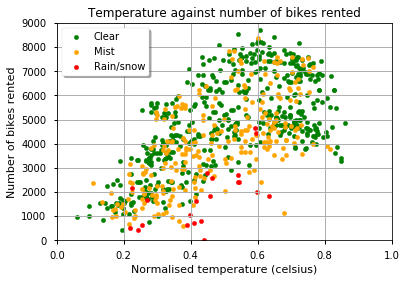

In [5]:
# YOUR CODE HERE

fig, ax1 = plt.subplots()

df_clear = df_bikeShare[df_bikeShare.weathersit==1]
df_mist  = df_bikeShare[df_bikeShare.weathersit==2]
df_rain  = df_bikeShare[df_bikeShare.weathersit==3]
ax1.scatter(df_clear.temp, df_clear.cnt, c='g', s=20, label="Clear")
ax1.scatter(df_mist.temp, df_mist.cnt, c='orange', s=20, label="Mist")
ax1.scatter(df_rain.temp, df_rain.cnt, c='r', s=20, label="Rain/snow")

ax1.grid(True)
ax1.set_title('Temperature against number of bikes rented')
ax1.set_xlabel('Normalised temperature (celsius)')
ax1.set_ylabel('Number of bikes rented')
plt.ylim([0,9000])
plt.xlim([0,1])
plt.legend(shadow=True)
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

As the outside temperature increases the number of bikes rented also increases. The weather situation of light snow/rain, etc. has a smaller range of values, and has a lower number of bikes rented on average than the other weather situations. 
</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

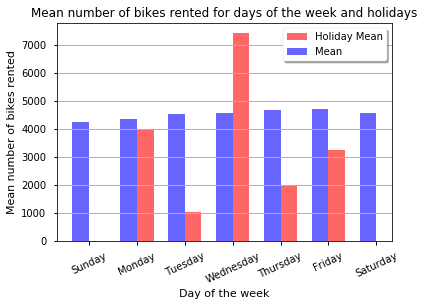

In [6]:
# YOUR CODE HERE

df_dayWeek = df_bikeShare.groupby(['weekday'])['cnt'].mean()
df_holiday = df_bikeShare.groupby(['weekday', 'holiday'], as_index=False)['cnt'].mean()
df_holiday = df_holiday[df_holiday.holiday==1]

fig, ax2 = plt.subplots()

holiday = ax2.bar(df_holiday.weekday, df_holiday.cnt, align='edge', width=0.35, label='Holiday Mean', color='r', alpha = 0.6)
dayWeek = ax2.bar(df_dayWeek.index, df_dayWeek, align='edge',  width=-0.35, label='Mean', color='b', alpha = 0.6)

ax2.set_title("Mean number of bikes rented for days of the week and holidays")
ax2.set_ylabel("Mean number of bikes rented")
ax2.set_xlabel("Day of the week")
ax2.set_xticks(np.arange(7))
ax2.set_xticklabels(('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), rotation=25)

ax2.legend(shadow=True)
ax2.yaxis.grid(True)

plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

The relationship between the day of the week and the number of bikes rented throughout the week is maximal Thursdays and Fridays, and minimal on Sundays and Mondays. However, the relationship between holidays and the number of bikes is much higher on Wednesdays which could be the result of an event/s but is lower than the average day for all other weekdays.
</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE

The number of registered users is around a thousand less on holidays compared to working days, and the number of casual users is under a thousand more on holidays compared to working days. This data suggests that a portion of registered users are using the bike share service for commuting to work while a portion of casual users are using the service for transportation on holidays.
</span>

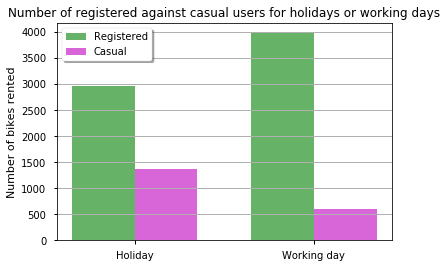

In [7]:
# YOUR CODE HERE

df_users = df_bikeShare.groupby(['workingday'])['registered', 'casual'].mean()

fig, ax3 = plt.subplots()

holiday = ax3.bar(df_users.index, df_users.registered, align='edge', width=-0.35, label='Registered', color='g', alpha = 0.6)
workingDay = ax3.bar(df_users.index, df_users.casual, align='edge',  width=0.35, label='Casual', color='m', alpha = 0.6)

ax3.set_title("Number of registered against casual users for holidays or working days")
ax3.set_ylabel("Number of bikes rented")
ax3.set_xticks(np.arange(2))
ax3.set_xticklabels(('Holiday', 'Working day'))

ax3.legend(shadow=True)
ax3.yaxis.grid(True)
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

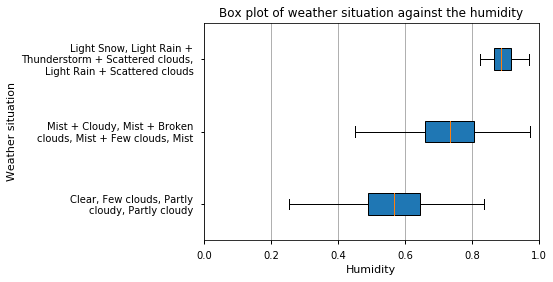

In [8]:
# YOUR CODE HERE
fig, ax4 = plt.subplots()

df_weatherHum = df_bikeShare.groupby(['weathersit'])['hum'].apply(list)
weather_plot = ax4.boxplot(df_weatherHum, labels=df_weatherHum.index, vert=False, patch_artist=True)

ax4.set_title("Box plot of weather situation against the humidity")
ax4.set_ylabel("Weather situation")
ax4.set_xlabel("Humidity")
ax4.set_yticks(np.arange(3)+1)
ax4.set_yticklabels(('Clear, Few clouds, Partly\ncloudy, Partly cloudy','Mist + Cloudy, Mist + Broken\nclouds, Mist + Few clouds, Mist','Light Snow, Light Rain +\nThunderstorm + Scattered clouds,\nLight Rain + Scattered clouds'))

ax4.xaxis.grid(True)
plt.xlim([0,1])
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

The weather situation has a relationship with the windspeed. For clear weather there is a lower median humidity than misty and light snow/rain weather situations.
</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

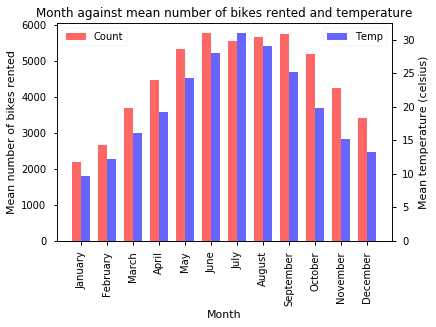

In [9]:
# YOUR CODE HERE
fig, ax5 = plt.subplots()
ax51 = ax5.twinx()

df_month = df_bikeShare.groupby(['mnth'])['cnt', 'temp'].mean()
count_month = ax5.bar(df_month.index, df_month.cnt, align='edge', width=-0.35, label='Count', color='r', alpha = 0.6)
temp_month = ax51.bar(df_month.index, df_month.temp*41, align='edge', width=0.35, label='Temp', color='b', alpha = 0.6)
ax5.set_title("Month against mean number of bikes rented and temperature")
ax5.legend(loc='upper left')
ax51.legend()
ax51.set_ylabel('Mean temperature (celsius)')
ax5.set_ylabel('Mean number of bikes rented')
ax5.set_xlabel('Month')
ax5.set_xticks(np.arange(12)+1)
ax5.set_xticklabels(('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation = 90)
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

There is a relationship between the mean temperature and the number of bikes rented per month. The months of June, July, and August recorded the highest mean temperatures for the data but also the highest mean number of bikes rented per month. The months of January, February, and December recorded the lowest mean temperatures for the data but also the lowest mean number of bikes rented per month.
</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

Accuracy (R^2): 0.8330668575426832


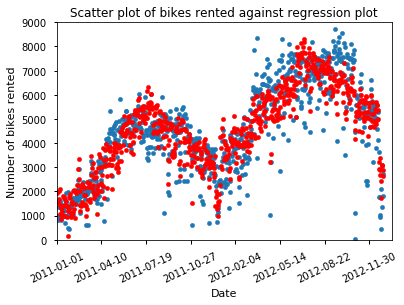

In [10]:
# YOUR CODE HERE

lm = LinearRegression()

x = df_bikeShare[['season','yr','mnth','weekday','weathersit','temp','hum','windspeed']]
y = df_bikeShare.cnt

index = np.array(df_bikeShare.index).reshape(-1,1)

lm = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=13)

lm.fit(x_train, y_train)

print("Accuracy (R^2):", lm.score(x_test, y_test))

product = np.multiply(lm.coef_, x)
estimate = np.sum(product, axis=1)+lm.intercept_


fig, ax6 = plt.subplots()

actual = ax6.scatter(df_bikeShare.index, df_bikeShare.cnt, s=20)
regression = ax6.scatter(index, estimate, c='r', s=20)

ax6.set_title("Scatter plot of bikes rented against regression plot")
ax6.set_ylabel("Number of bikes rented")
ax6.set_xlabel("Date")
ax6.set_xticks(np.arange(8)*100)
ax6.set_xticklabels(('2011-01-01','2011-04-10','2011-07-19','2011-10-27','2012-02-04','2012-05-14','2012-08-22','2012-11-30'), rotation = 25)
plt.ylim([0,9000])
plt.xlim([0,750])
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

Using the train_test_split function from the sklearn library allows the seasonal and environmental variables to be split into test and train data for these variables mapping to the number of bikes rented. Some notable features of the regression is the increase from the first year of data to the second year. Also the peaks around the months of June, July, and August demonstrate the rise of summer bike use, whereas the troughs around December represent the diminished winter bike use. These trends are correlated to the temperatures experienced during these time periods as well and would be important for companies to manage.

</span>